# The implementation of linear regression. 
## Author: Bojian Xu, bojianxu@ewu.edu

It supports the following: 

- multiple features, i.e., $d\geq 1$
- regularization: $E(w) = \frac{1}{N}\lVert Xw-y\rVert^2 + \frac{\lambda}{N} \lVert w\rVert^2$
- using the in-form calculation
- using the gradient descent


In [1]:
import numpy as np
from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output

import linear_regression as LR
import sys

sys.path.append('..')
from misc.utils import MyUtils

In [2]:
def display_w_2D(w, x_range = (0.0, 1.0), y_range = (0,0,1.0), color = 'red', degree = 1):
    ''' only support: degree <= 4 for demo purpose
        Don't have time to code out the generic form for any degree
    '''
    xrange = np.arange(x_range[0], x_range[1], delta)
    yrange = np.arange(y_range[0], y_range[1], delta)
    x, y = np.meshgrid(xrange,yrange)
    
    if degree == 1:
        F = w[0] + w[1] * x - y
    elif degree == 2:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) - y
    elif degree == 3:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3) - y
    elif degree == 4:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3) + w[4] * np.power(x,4) - y
    else:
        print('Z space degree is too high. Not supported now\n')
        quit()

    plt.contour(x, y, (F), [0], colors = color)

In [3]:
seed()

In [4]:
n = 100

In [5]:
r = 2

In [6]:
delta = 0.01

In [7]:
d = 1

In [8]:
x = np.linspace(start=0.01, stop=1.99, num=n)
y = np.power(x,r) * 2 + np.power(x,r)  + np.random.normal(loc=0.0, scale=0.5, size=n)
#print(x)
#print(y)

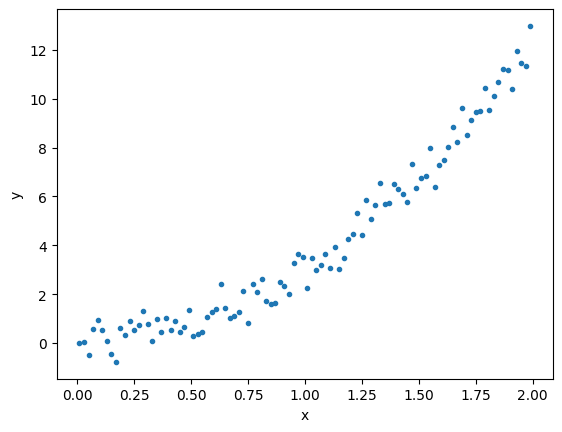

In [9]:
# display the data samples
plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
z_r = r+2

lr = LR.LinearRegression()


lr.fit(x.reshape(-1,1), y.reshape(-1,1), CF = False, lam = 0.1, eta = 0.001, epochs = 10000, degree = z_r)


print('Learned w:\n', lr.w)
print('MSE:\n', lr.MSE)




GRADIENT DESCENT FIT

I:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
I shape:
(5, 5)
XTX shape:
(5, 5)
Learned w:
 [[ 0.08570244]
 [ 0.91899525]
 [ 1.1690718 ]
 [ 0.96972364]
 [-0.11706896]]


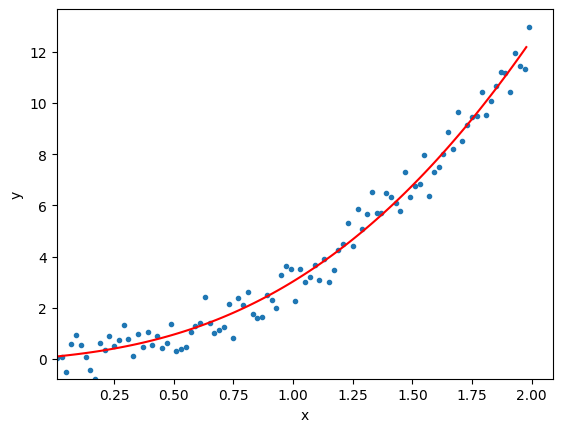

In [11]:
plt.scatter(x, y, marker='.')
display_w_2D(lr.w, x_range = (min(x),max(x)), y_range = (min(y),max(y)), color = 'red', degree = z_r)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
plt.scatter(np.arange(len(lr.MSE)-1000), lr.MSE[1000:], marker='.')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'MSE'